In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
mnist = tf.keras.datasets.mnist
( x_train, y_train ), ( x_test, y_test ) = mnist.load_data()

# Nomalization
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = tf.cast( x_train, tf.float32 )
x_test = tf.cast( x_test, tf.float32 )

print( x_train.shape, y_train.shape )

(60000, 28, 28) (60000,)


In [3]:
nb_classes = 10

In [4]:
# Reshape
x_train = tf.reshape( x_train, [ -1, 784 ] )
x_test = tf.reshape( x_test, [ -1, 784 ] )
print( x_train.shape, x_test.shape )

(60000, 784) (10000, 784)


In [5]:
# one-hot Encoding
y_train = tf.keras.utils.to_categorical( y_train, nb_classes )
y_test = tf.keras.utils.to_categorical( y_test, nb_classes )

# or
# y_train = tf.one_hot( tf.cast( y_train, tf.int32 ), 10 )
# y_train = tf.reshape( y_train, [ -1, 10 ] )
# y_test = tf.reshape( tf.one_hot( y_test, 10 ), [ -1, 10 ] )

print( y_train.shape, y_test.shape )

(60000, 10) (10000, 10)


In [6]:
learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int( len( x_train ) / batch_size )

In [7]:
W = tf.Variable( tf.random.normal( [ 784, nb_classes ] ) )
b = tf.Variable( tf.random.normal( [ nb_classes ] ) )

In [8]:
@tf.function
def Hypothesis( X ):
    return (  tf.matmul( X, W ) + b )

@tf.function
def Cost( X, Y ):
    return ( tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(
            logits = Hypothesis( X ), labels = tf.stop_gradient( Y ) )
    ) )

def Minimize( X, Y ):
    loss = lambda: Cost( X ,Y )
    
    tf.keras.optimizers.Adam( learning_rate ).minimize( loss, [ W, b ] )

In [9]:
def CorrectPrediction( X, Y ):
    return ( tf.equal( tf.argmax( Hypothesis( X ), axis = 1 ),
                      tf.argmax( Y, axis = 1 ) ) )

def Accuracy( X, Y ):
    return ( tf.reduce_mean( tf.cast( CorrectPrediction( X, Y ), tf.float32 ) ) )

In [10]:
for epoch in range( num_epochs ):
    avg_cost = 0
    
    start_batch, end_batch = 0, batch_size
    for iteration in range( num_iterations ):
        batch_xs, batch_ys = \
            x_train[ start_batch : end_batch ], y_train[start_batch : end_batch ]
        
        Minimize( batch_xs, batch_ys )
        cost_val = Cost( batch_xs, batch_ys )
        
        avg_cost += cost_val / num_iterations
        
        start_batch = start_batch + batch_size
        end_batch = end_batch + batch_size
    
    print( 'Epoch: {:04d}, Cost: {:.9f}'.format( epoch + 1, avg_cost ) )
    
print( 'Learning finished' )
        
    

Epoch: 0001, Cost: 4.971765041
Epoch: 0002, Cost: 1.494930267
Epoch: 0003, Cost: 1.040169477
Epoch: 0004, Cost: 0.886379123
Epoch: 0005, Cost: 0.812619984
Epoch: 0006, Cost: 0.769787967
Epoch: 0007, Cost: 0.742399216
Epoch: 0008, Cost: 0.723565519
Epoch: 0009, Cost: 0.710103571
Epoch: 0010, Cost: 0.700298548
Epoch: 0011, Cost: 0.692836225
Epoch: 0012, Cost: 0.687245727
Epoch: 0013, Cost: 0.682766020
Epoch: 0014, Cost: 0.679061174
Epoch: 0015, Cost: 0.676144719
Epoch: 0016, Cost: 0.673806012
Epoch: 0017, Cost: 0.671688914
Epoch: 0018, Cost: 0.669959843
Epoch: 0019, Cost: 0.668563068
Epoch: 0020, Cost: 0.667436481
Epoch: 0021, Cost: 0.666700900
Epoch: 0022, Cost: 0.666157663
Epoch: 0023, Cost: 0.665712953
Epoch: 0024, Cost: 0.665434897
Epoch: 0025, Cost: 0.665210366
Epoch: 0026, Cost: 0.665087998
Epoch: 0027, Cost: 0.665006697
Epoch: 0028, Cost: 0.664994001
Epoch: 0029, Cost: 0.665089011
Epoch: 0030, Cost: 0.665186226
Epoch: 0031, Cost: 0.665223420
Epoch: 0032, Cost: 0.665291786
Epoch: 0

In [11]:
tf.print( 'Accuracy: ', Accuracy( x_test, y_test ))

Accuracy:  0.9159


In [12]:
r = random.randint( 0, len( x_test ) - 1 )
tf.print( 'Label: ', tf.argmax( y_test[ r: r + 1 ], axis = 1 ) )
tf.print( 
    'Prediction: ', tf.argmax(Hypothesis( x_test[ r: r + 1] ), axis = 1 ) )

Label:  [1]
Prediction:  [1]


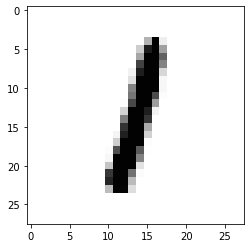

In [13]:
plt.imshow( 
    tf.reshape( x_test[ r: r + 1], [ 28, 28 ] ),
    cmap = 'Greys',
    interpolation = 'nearest'
)
plt.show()